In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r'C:\Users\useme\Downloads\StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# Q.1 Find out how many males females participated in the test.

In [4]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# Q.2 What do you think about the students's parental level of education?

In [5]:
data['average score']=(data['math score']+data['writing score']+data['reading score']/3)

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group C,some high school,free/reduced,none,0,17,10,15.666667
1,female,group B,high school,free/reduced,none,8,24,23,39.000000
2,female,group B,some high school,free/reduced,none,18,32,28,56.666667
3,female,group B,some college,standard,none,11,38,32,55.666667
4,female,group C,some college,free/reduced,none,22,39,33,68.000000


In [7]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

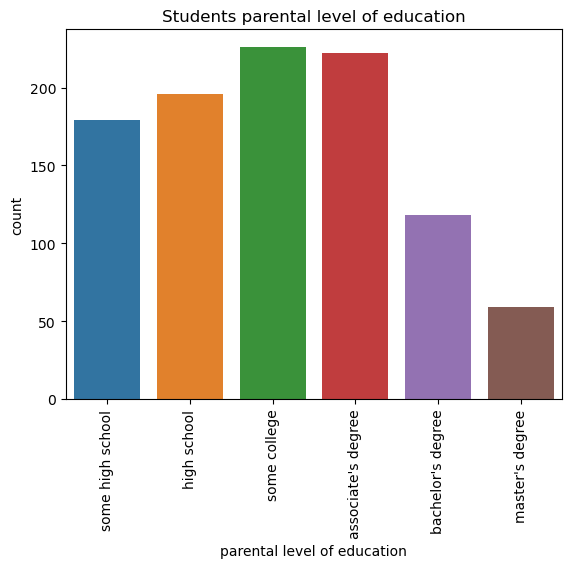

In [9]:
sns.countplot(x='parental level of education',data=data)
plt.xticks(rotation=90)
plt.title('Students parental level of education')
plt.show()

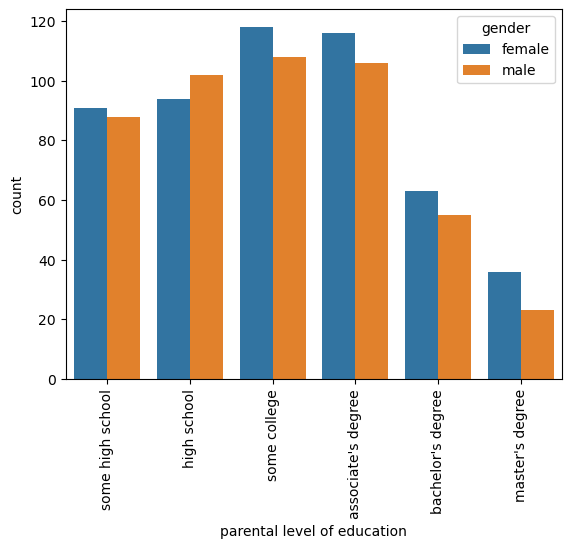

In [10]:
sns.countplot(x="parental level of education", hue="gender", data=data)
plt.xticks(rotation=90)
plt.show()

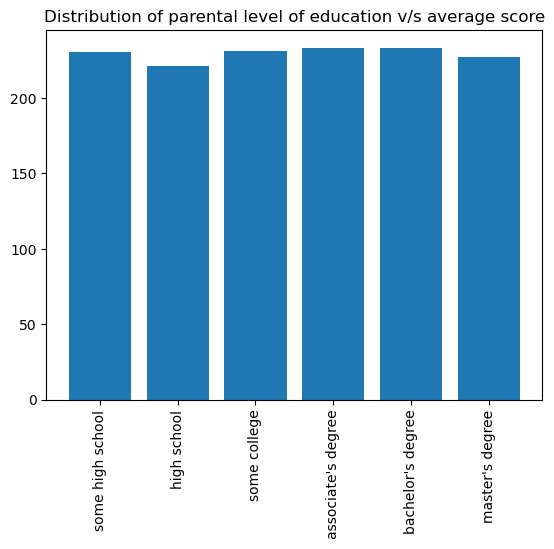

In [11]:
plt.bar(data['parental level of education'],data['average score'])
plt.xticks(rotation=90)
plt.title('Distribution of parental level of education v/s average score')
plt.show()

**From the above analysis, we can infer that students with an associate's degree and a bachelor's degree as parental levels of education have the same average score, and students with a high school as parental level of education have the lowest average score. 

**Most of the students belong to 'some college' category.

# Q.3 Who scores the most on average for math,reading and writing based on Gender & Test preparation course?

In [12]:
data.groupby('gender')['math score','reading score','writing score'].mean()

C:\Users\useme\AppData\Local\Temp\ipykernel_15036\1961774292.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('gender')['math score','reading score','writing score'].mean()


,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


**Male students have higher average math score than female students.

**Female students have higher average reading & writing score than male students.

In [13]:
data.groupby('test preparation course')['math score','reading score','writing score'].mean()

C:\Users\useme\AppData\Local\Temp\ipykernel_15036\245703330.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('test preparation course')['math score','reading score','writing score'].mean()


,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


**Students who have completed the test preparation course score higher average marks for math, reading, and writing than those who don't complete the course.

# Q.4 What do you think about the scoring variation for math,reading and writing based on Gender & Test preparation course?

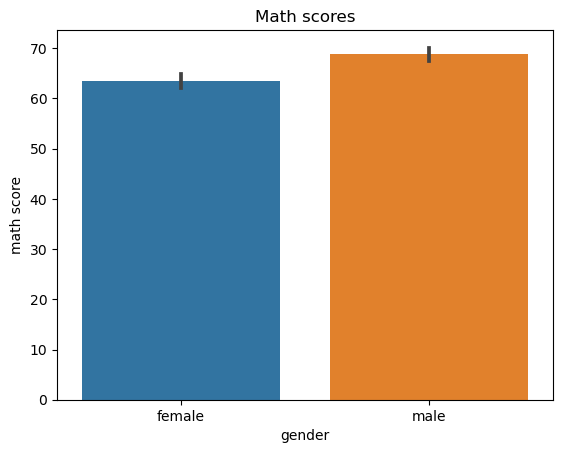

In [14]:
sns.barplot(x='gender',y='math score',data=data)
plt.title('Math scores')
plt.show()

In [15]:
import statistics as stat

In [16]:
stat.variance(data['math score'])

242.4114104104104

In [17]:
stat.stdev(data['math score'])

15.569566802272002

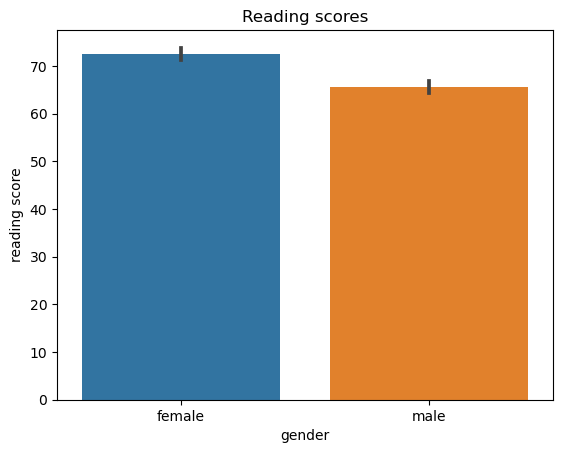

In [18]:
sns.barplot(x='gender',y='reading score',data=data)
plt.title('Reading scores')
plt.show()

In [19]:
stat.variance(data['reading score'])

216.27925425425425

In [20]:
stat.stdev(data['reading score'])

14.706435810700507

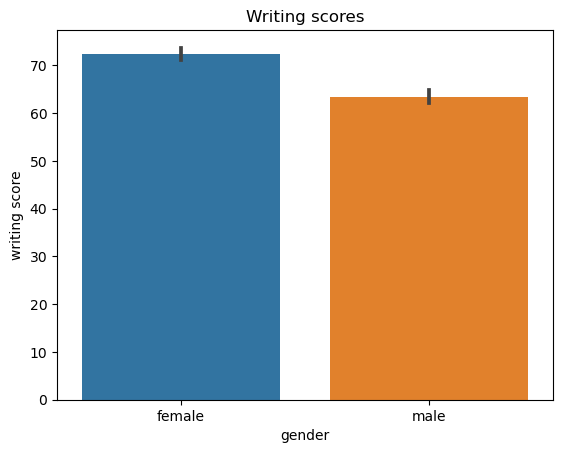

In [21]:
sns.barplot(x='gender',y='writing score',data=data)
plt.title('Writing scores')
plt.show()

In [22]:
stat.variance(data['writing score'])

231.84268168168168

In [23]:
stat.stdev(data['writing score'])

15.226381109169758

**We can see that male students scored higher in Maths whereas female students scored higher in Reading and Writing.

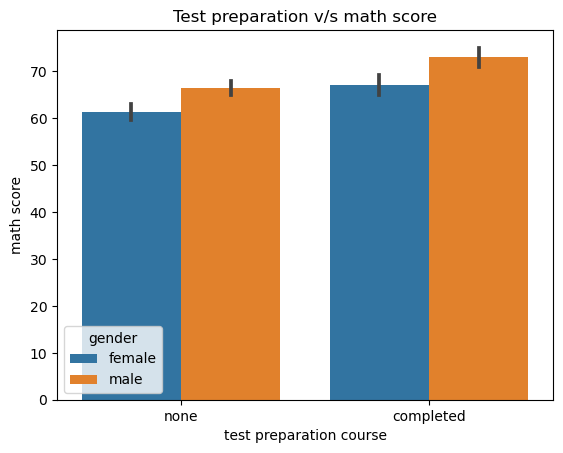

In [24]:
sns.barplot(x='test preparation course',y='math score',hue='gender',data=data)
plt.title('Test preparation v/s math score')
plt.show()

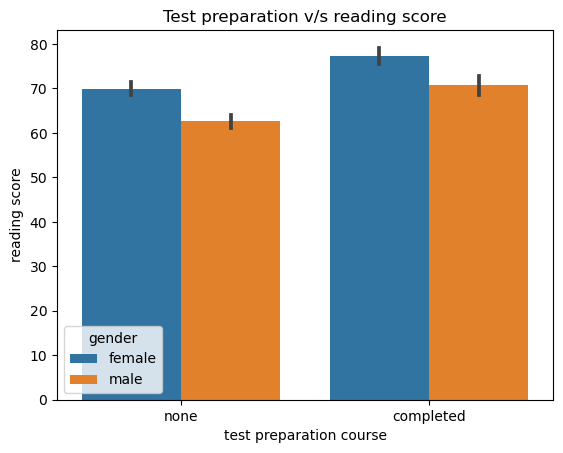

In [26]:
sns.barplot(x='test preparation course',y='reading score',hue='gender',data=data)
plt.title('Test preparation v/s reading score')
plt.show()

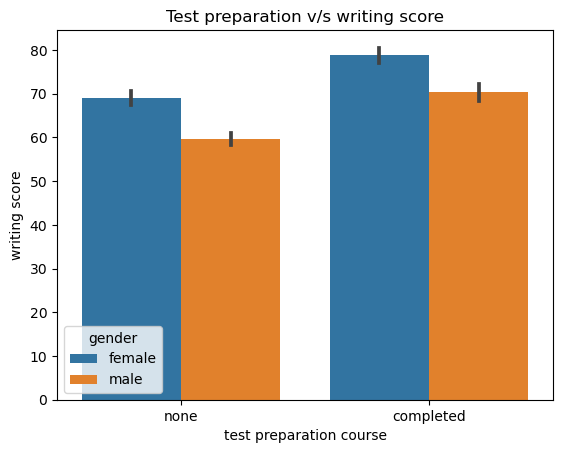

In [27]:
sns.barplot(x='test preparation course',y='writing score',hue='gender',data=data)
plt.title('Test preparation v/s writing score')
plt.show()

**The students(male & female) who completed the test preparation course scored higher in all three subjects.

# Q.5 The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help?

In [28]:
data['math score'].quantile(0.75)

77.0

In [29]:
top25= data[data['math score']>=77].sort_values('math score',ascending=False)
top25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
999,male,group E,bachelor's degree,standard,completed,100,100,100,233.333333
998,male,group E,associate's degree,free/reduced,completed,100,100,93,226.333333
997,male,group D,some college,standard,completed,100,97,99,231.333333
996,male,group A,some college,standard,completed,100,96,86,218.000000
517,female,group E,associate's degree,standard,none,100,100,100,233.333333
...,...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69,168.666667
855,male,group E,associate's degree,free/reduced,completed,77,69,68,168.000000
856,male,group E,some high school,standard,completed,77,76,77,179.333333
415,female,group B,master's degree,free/reduced,completed,77,97,94,203.333333
